In [25]:
import os
import matplotlib.pyplot as plt
import numpy as np
import mesaPlot as mp
import pandas as pd
from mint_general_interpolation_grid_builder.functions_natalie.custom_mpl_settings import (
    load_mpl_rc,
)
load_mpl_rc()
cmap = plt.get_cmap('viridis')
from functions import add_Teff

In [28]:
evol_phase = 'EAGB'
df = pd.read_csv(f'/Users/natalierees/MINT_grids_23051/Z0.02/{evol_phase}/paper_tracks_Z2.00e-02_{evol_phase}.csv',index_col=[0])
df['MASS'].unique()

array([ 0.73,  0.83,  1.03,  1.18,  1.33,  1.48,  1.63,  1.83,  2.03,
        2.28,  2.53,  2.91,  3.29,  3.72,  4.2 ,  4.74,  5.35,  6.04,
        6.83,  7.71,  8.71,  9.83, 11.1 , 12.5 ])

In [45]:
TAMS_Teff

array([ 5702.68299326,  7351.01075981, 15966.77621347, 22721.14914737])

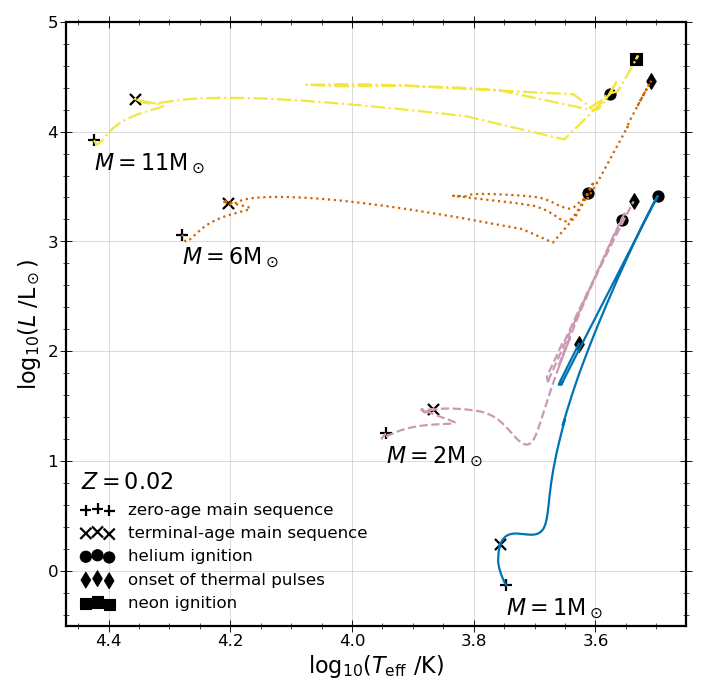

In [70]:
def load_track(evol_phase,M):
    df = pd.read_csv(f'/Users/natalierees/MINT_grids_23051/Z0.02/{evol_phase}/paper_tracks_Z2.00e-02_{evol_phase}.csv',index_col=[0])
    df = add_Teff(df)

    if evol_phase == 'MS':
        df['INITIAL_MASS'] = df['MASS']
        df = df[df['CENTRAL_HYDROGEN']>1e-6]
        df.sort_values(['CENTRAL_HYDROGEN'],ascending=False,inplace=True)
    
    if evol_phase == 'CHeB':
        df.sort_values(['CENTRAL_HELIUM'],ascending=False,inplace=True)

    track = df[(df['MASS']==M)&(df['INITIAL_MASS']==M)]

    return track


fig,ax=plt.subplots(figsize=(10,10))

TAMS_Teff = np.array([])
TAMS_L = np.array([])
ZAMS_Teff = np.array([])
ZAMS_L = np.array([])
ZACHeB_Teff = np.array([])
ZACHeB_L = np.array([])
TACHeB_Teff = np.array([])
TACHeB_L = np.array([])
TP_Teff = np.array([])
TP_L = np.array([])
NeIgn_Teff = np.array([])
NeIgn_L = np.array([])

for i,M in enumerate([1.03,2.03,6.04,11.1]):

    Teff = np.array([])
    L = np.array([])
    
    for evol_phase in ['MS','GB','CHeB','EAGB']:
        track = load_track(evol_phase,M)
        Teff = np.append(Teff,track['EFFECTIVE_TEMPERATURE'])
        L = np.append(L,track['LUMINOSITY'])
        
        if evol_phase == 'MS':
            TAMS_Teff = np.append(TAMS_Teff,[Teff[-1]])
            TAMS_L = np.append(TAMS_L,[L[-1]])
            ZAMS_Teff = np.append(ZAMS_Teff,[Teff[0]])
            ZAMS_L = np.append(ZAMS_L,[L[0]])

            ax.text(np.log10(Teff[0]), 
                    np.log10(L[0])-0.1, 
                    '$M = $'+str(int(M))+'$\mathrm{M}_\odot$', 
                    horizontalalignment='left',
                    verticalalignment='top', 
                    )

        if evol_phase == 'GB':
            ZACHeB_Teff = np.append(ZACHeB_Teff,[Teff[-1]])
            ZACHeB_L = np.append(ZACHeB_L,[L[-1]])

        if evol_phase == 'CHeB':
            TACHeB_Teff = np.append(TACHeB_Teff,[Teff[-1]])
            TACHeB_L = np.append(TACHeB_L,[L[-1]])

        if evol_phase == 'EAGB':
            if M < 10:
                TP_Teff = np.append(TP_Teff,[Teff[-1]])
                TP_L = np.append(TP_L,[L[-1]])
            else:
                NeIgn_Teff = np.append(NeIgn_Teff,[Teff[-1]])
                NeIgn_L = np.append(NeIgn_L,[L[-1]])

    ax.plot(
        np.log10(Teff),
        np.log10(L),
        color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i+4],
        ls = plt.rcParams['axes.prop_cycle'].by_key()['linestyle'][i+4],
        # label= '$M = $'+str(round(M,0))+'$\mathrm{M}_\odot$'
        )


ax.scatter(np.log10(ZAMS_Teff),np.log10(ZAMS_L),label='zero-age main sequence',marker = '+',s=100,c='black')
ax.scatter(np.log10(TAMS_Teff),np.log10(TAMS_L),label='terminal-age main sequence',marker = 'x',s=100,c='black')
ax.scatter(np.log10(ZACHeB_Teff),np.log10(ZACHeB_L),label='helium ignition',marker = 'o',s=100,c='black')
# ax.scatter(np.log10(TACHeB_Teff),np.log10(TACHeB_L),label='terminal-age core helium burning',marker = 's',s=100,c='black')
ax.scatter(np.log10(TP_Teff),np.log10(TP_L),label='onset of thermal pulses',marker = 'd',s=100,c='black')
ax.scatter(np.log10(NeIgn_Teff),np.log10(NeIgn_L),label='neon ignition',marker = 's',s=100,c='black')

ax.invert_xaxis()
ax.set(xlabel='$\log_{10}(T_\mathrm{eff}~/\mathrm{K})$',ylabel= '$\log_{10}(L~/\mathrm{L}_\odot)$')
leg = ax.legend(title = '$Z=0.02$',frameon=False,loc= 'lower left')
leg._legend_box.align = "left"

ax.set_ylim(-0.5,5)

plt.savefig(f'plots/IntroHR.jpeg',dpi=200)
plt.show()

In [100]:
m.hist.data['star_mass']-m.hist.data['he_core_mass']

array([2.41163374, 2.41163374, 2.41163374, ..., 0.3323655 , 0.33148429,
       0.33078397])

No handles with labels found to put in legend.


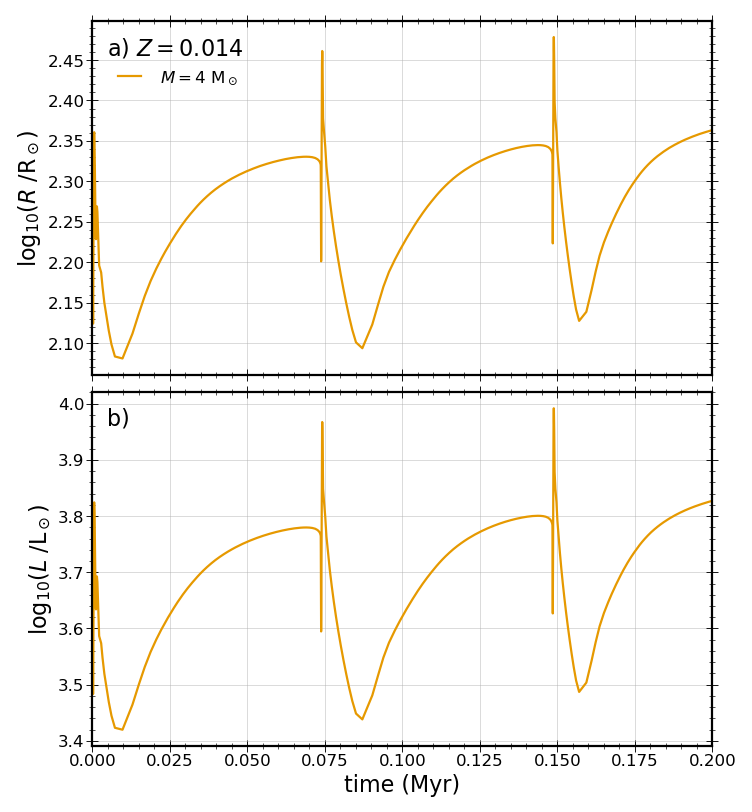

In [120]:
m = mp.MESA()
mass = 3.0
m.loadHistory(f'/Users/natalierees/agb_grid_23051/Z0.014/{mass}/LOGS_TPAGB')

fig,ax=plt.subplots(2,1,figsize=(10,12),sharex=True)

filter = np.where(m.hist['star_age']/1e6<0.2)[0]
ax[0].plot(m.hist['star_age'][filter]/1e6,m.hist['log_R'][filter],label = '$M=4~\mathrm{M}_\odot$')
ax[1].plot(m.hist['star_age'][filter]/1e6,m.hist['log_L'][filter],label = '_$M=4~\mathrm{M}_\odot$')

ax[0].set_xlim(0,0.2)
ax[1].set(ylabel='$\log_{10}(L~/\mathrm{L}_\odot)$')
ax[0].set(ylabel='$\log_{10}(R~/\mathrm{R}_\odot)$')
ax[1].set(xlabel='time (Myr)')

ax[0].legend(title = 'a) $Z=0.014$',frameon=False,loc='upper left')
ax[1].legend(title = 'b)',frameon=False,loc='upper left')

plt.savefig(f'plots/IntroThermalPulses.jpeg',dpi=200)
plt.show()